In [1]:
!pip install matplotlib==3.2.2

from IPython.display import clear_output
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, \
                                 plot_bloch_multivector

backend_sim = Aer.get_backend('qasm_simulator')
backend_vec = BasicAer.get_backend('statevector_simulator')

%matplotlib inline
clear_output()

# Classical Bits

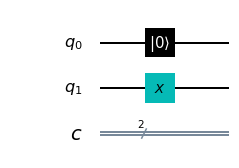

In [2]:
circ = QuantumCircuit(2, 2)

circ.reset(0) # initialize qubit_0 to 0
circ.x(1) # initialize qubit_1 to 1

circ.draw('mpl')

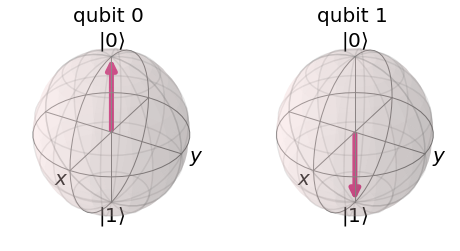

In [3]:
job = execute(circ, backend_vec).result()
plot_bloch_multivector(job.get_statevector(circ)) # plot qubit statevectors

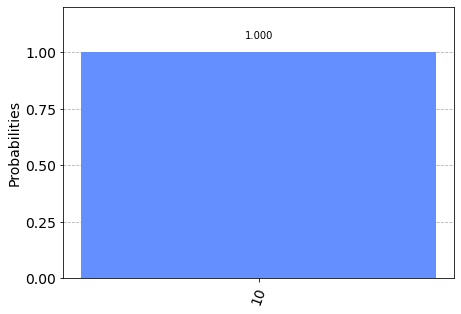

In [4]:
circ.measure([0, 1], [0, 1]) # collapse qubit states

job_sim = execute(circ, backend_sim, shots=1000).result()
counts = job_sim.get_counts(circ) # run quantum simulation

plot_histogram(counts) 

# Qubits

## Superposition

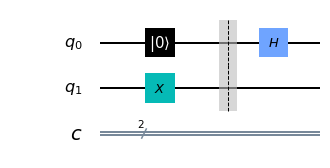

In [5]:
circ = QuantumCircuit(2, 2)

circ.reset(0) # initialize qubit_0 to 0
circ.x(1) # initialize qubit_1 to 1
circ.barrier()
circ.h(0) # apply hadamard gate to qubit_0

circ.draw('mpl')

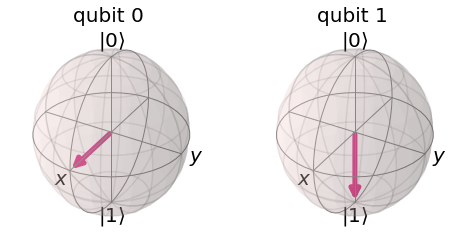

In [6]:
job = execute(circ, backend_vec).result()
plot_bloch_multivector(job.get_statevector(circ)) # plot qubit statevectors

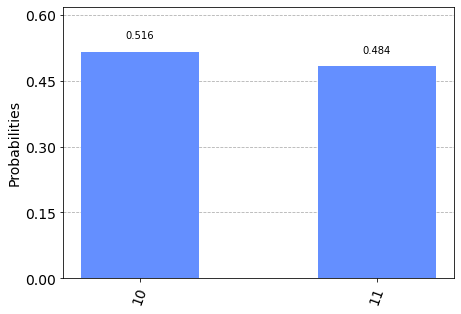

In [7]:
circ.measure([0, 1], [0, 1]) # collapse qubit states

job_sim = execute(circ, backend_sim, shots=1000).result()
counts = job_sim.get_counts(circ) # run quantum simulation

plot_histogram(counts) 

## Entanglement

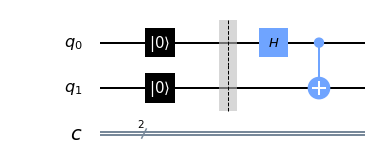

In [8]:
circ = QuantumCircuit(2, 2)

circ.reset([0, 1]) # initialize qubit_0 and qubit_1 to 0
circ.barrier()
circ.h(0) # apply hadamard gate to qubit_0
circ.cx(0, 1) # apply controlled x gate on 1 to 0

circ.draw('mpl')

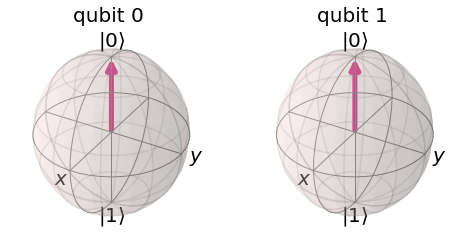

In [9]:
circ.measure([0, 1], [0, 1]) # collapse qubit states

job = execute(circ, backend_vec).result()
plot_bloch_multivector(job.get_statevector(circ)) # plot qubit statevectors

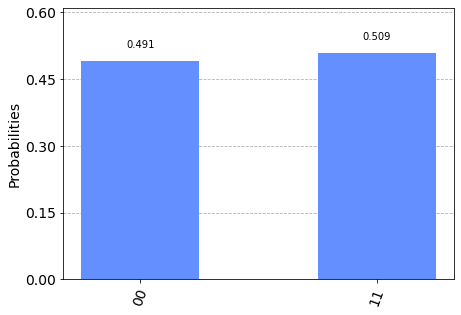

In [10]:
job_sim = execute(circ, backend_sim, shots=1000).result()
counts = job_sim.get_counts(circ) # run quantum simulation

plot_histogram(counts) 